# 💎 Diamond Price Prediction Project

This project predicts the selling price of diamonds based on their physical and visual characteristics.

We will use:

- 📈 **Multiple Linear Regression**: A statistical model that estimates diamond prices using numeric and encoded categorical features.

We'll also:

- Clean and preprocess the dataset by removing nulls and redundant columns  
- Visualize relationships between features and price using scatter plots and boxplots  
- Encode categorical features like **cut**, **color**, and **clarity**  
- Diagnose and resolve multicollinearity using **Variance Inflation Factor (VIF)**  
- Evaluate model performance using **R² Score**, **RMSE**, and **MAE**


## 📦 Step 1: Load Dataset

We load the diamond dataset directly from a public CSV URL using `pandas`.  
We'll also import essential libraries for data manipulation and visualization.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/diamonds.csv')


In [18]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 🔍 Step 2: Inspect the Dataset

We inspect the structure and summary of the data using `.info()`  
and check for missing values to assess the need for cleaning.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [20]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## ✅ No Missing Values

The output of `df.isnull().sum()` shows **0 missing values across all columns**.

This means:

- The dataset is **complete** and requires **no imputation** or removal of rows/columns due to nulls.
- We can proceed confidently with preprocessing and modeling without concerns of data loss due to missing values.
- This ensures a smoother pipeline and reduces complexity in data cleaning.


## 🧹 Step 3: Drop Redundant Columns

The `Unnamed: 0` column is an unnecessary index, so we drop it.

In [21]:
df.drop(columns=['Unnamed: 0'],inplace=True)

## 👁️ Step 4: View Data Sample

We display the first few rows of the cleaned dataset.


In [22]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## 🔎 Understanding the Dataset Columns

The dataset contains structured information about individual diamonds. Each row represents a diamond and includes the following features:

- **carat**: Weight of the diamond (numeric). Heavier diamonds generally cost more.
- **cut**: Quality of the cut (categorical) — includes values like *Fair*, *Good*, *Very Good*, *Premium*, and *Ideal*.
- **color**: Diamond color grading (categorical), ranging from *D* (best) to *J* (lowest).
- **clarity**: Measure of diamond purity (categorical), including grades like *SI2*, *VS1*, *VVS2*, etc.
- **depth**: Total depth percentage = `z / mean(x, y)` (numeric). Affects diamond appearance.
- **table**: Width of the top facet relative to the widest point (numeric). Related to light reflection.
- **price**: The target variable — price in USD (numeric).
- **x, y, z**: Physical dimensions of the diamond in mm along the three axes (length, width, depth).

🔹 The dataset is a blend of **categorical** and **numerical** features — perfect for regression modeling.  
🔹 The features describe both **physical properties** and **quality indicators**, giving us rich information to predict price accurately.


## 📊 Moving into Exploratory Data Analysis (EDA)

Before building any predictive models, it's crucial to **understand the underlying structure and patterns** within the data.

In this section, we will:

- 📦 Explore **categorical features** like `cut`, `color`, and `clarity` using boxplots  
- 📈 Visualize relationships between **numerical features** (e.g., `carat`, `depth`, `x`, `y`, `z`) and `price` using scatter plots  
- 📉 Examine the **distribution** of the target variable `price`  
- 🧠 Gain insights into potential correlations and trends that will guide our preprocessing and model selection

EDA helps us make **data-driven decisions** about feature engineering and highlight patterns that are **not obvious from raw tables**.


## 📊 Step 5: Categorical Features vs Price

We use boxplots to analyze how the price varies across:
- `cut`
- `color`
- `clarity`


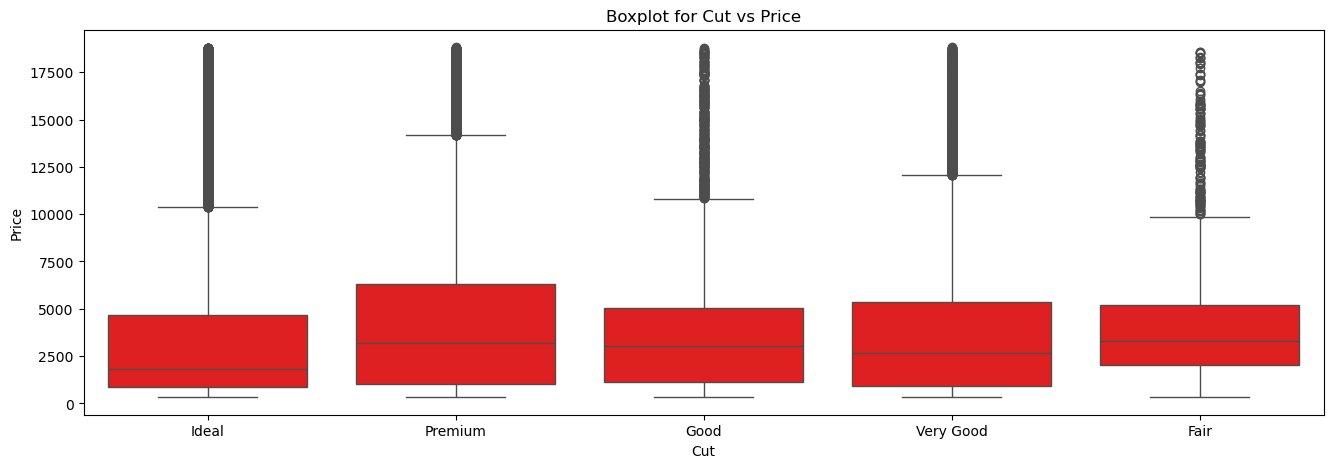

In [23]:
plt.figure(figsize=(16,5))
sns.boxplot(x='cut', y='price', data=df, color='red')
plt.title('Boxplot for Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


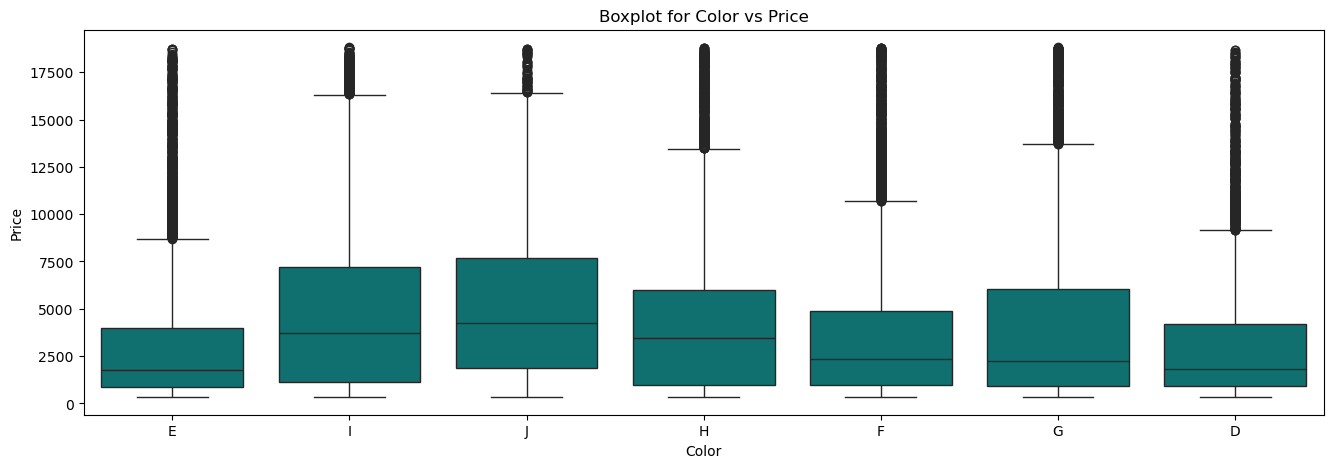

In [24]:
plt.figure(figsize=(16,5))
sns.boxplot(x='color', y='price', data=df, color='teal')
plt.title('Boxplot for Color vs Price')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()


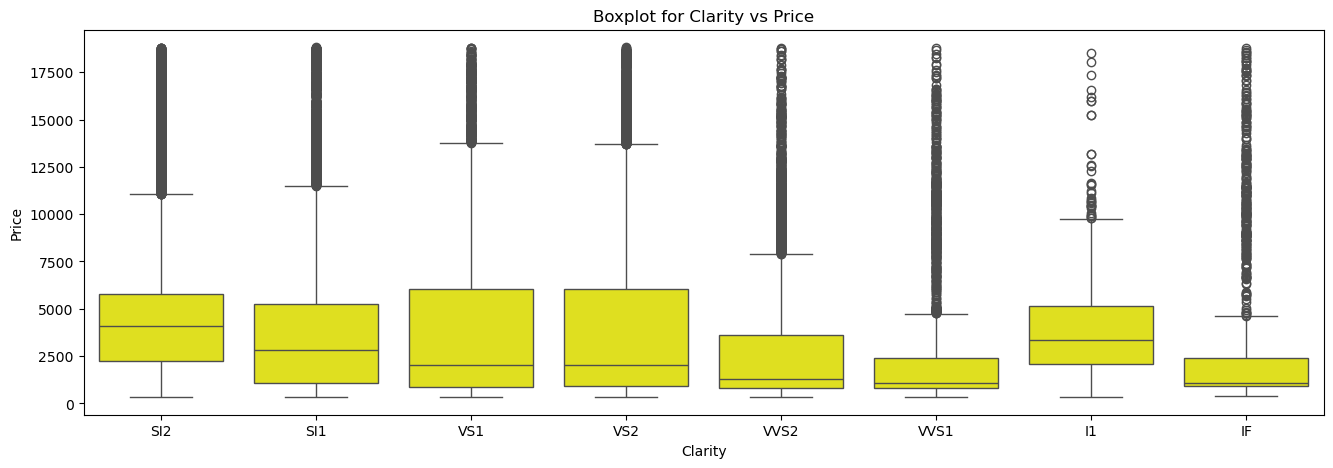

In [25]:
plt.figure(figsize=(16,5))
sns.boxplot(x='clarity', y='price', data=df, color='yellow')
plt.title('Boxplot for Clarity vs Price')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()


## 📈 Step 6: Numerical Features vs Price

We create scatter plots to explore how numeric features correlate with price.


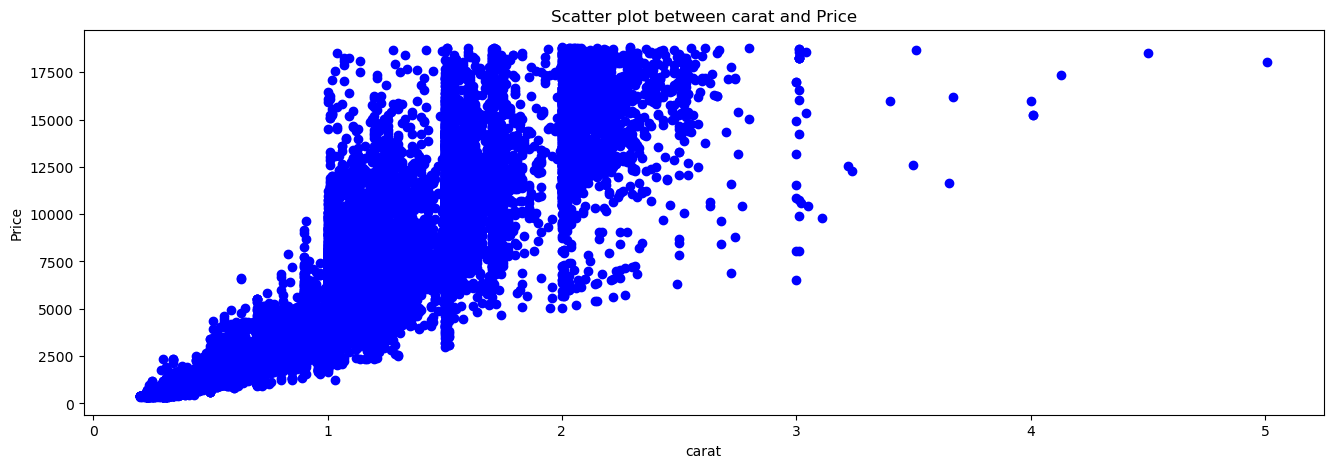

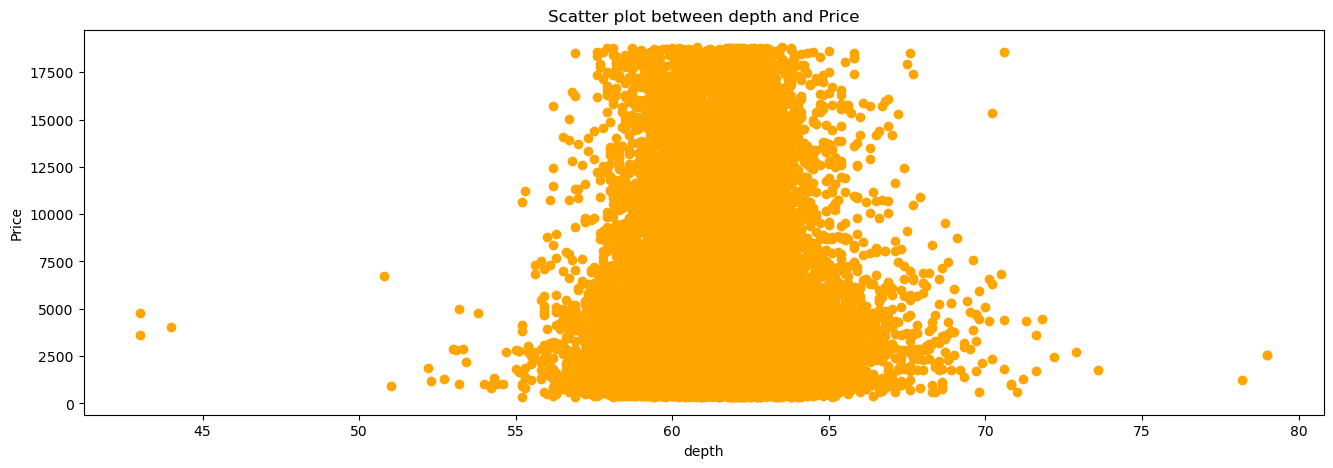

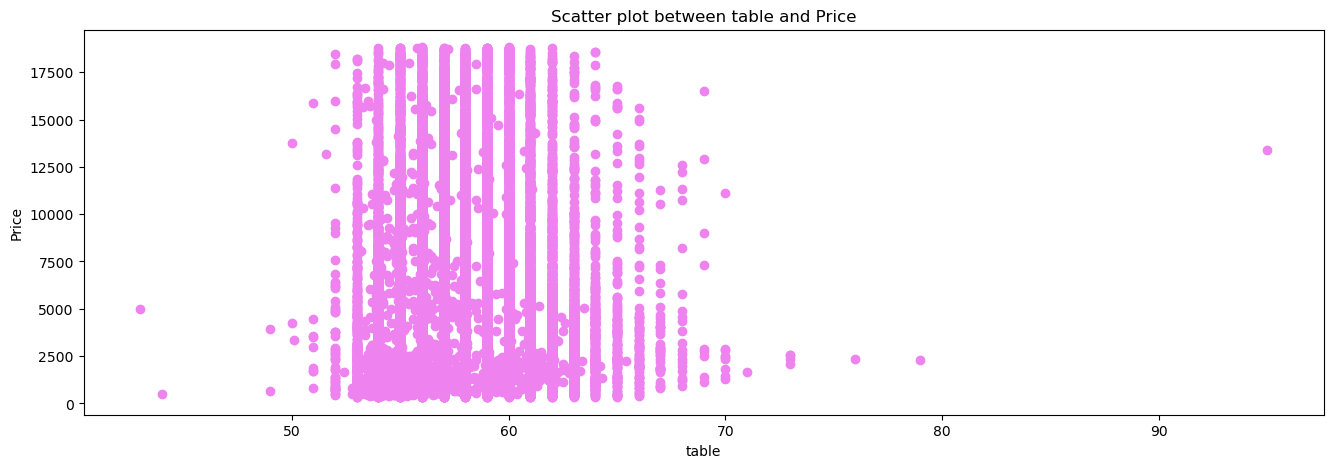

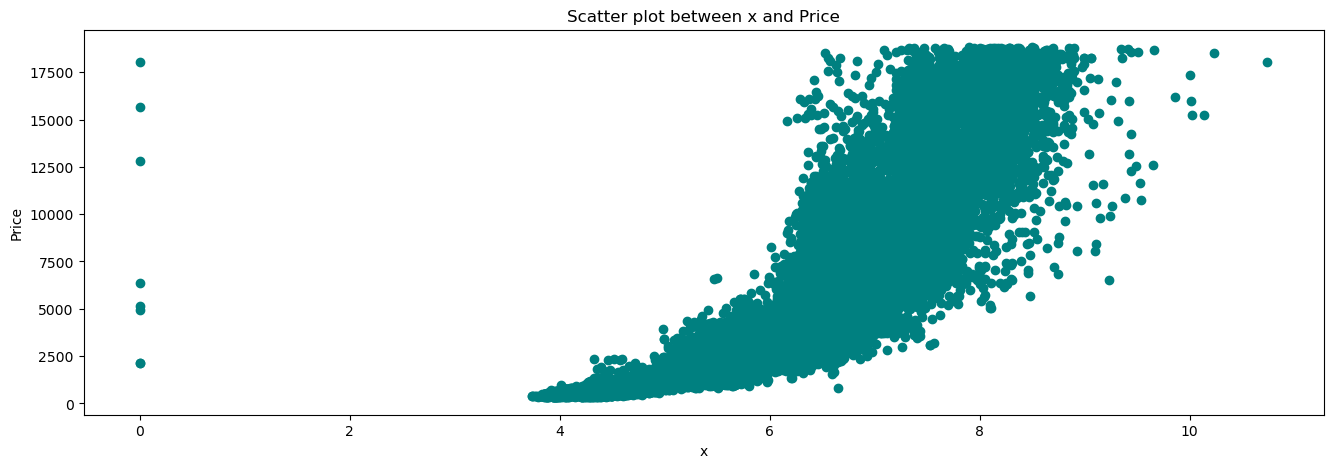

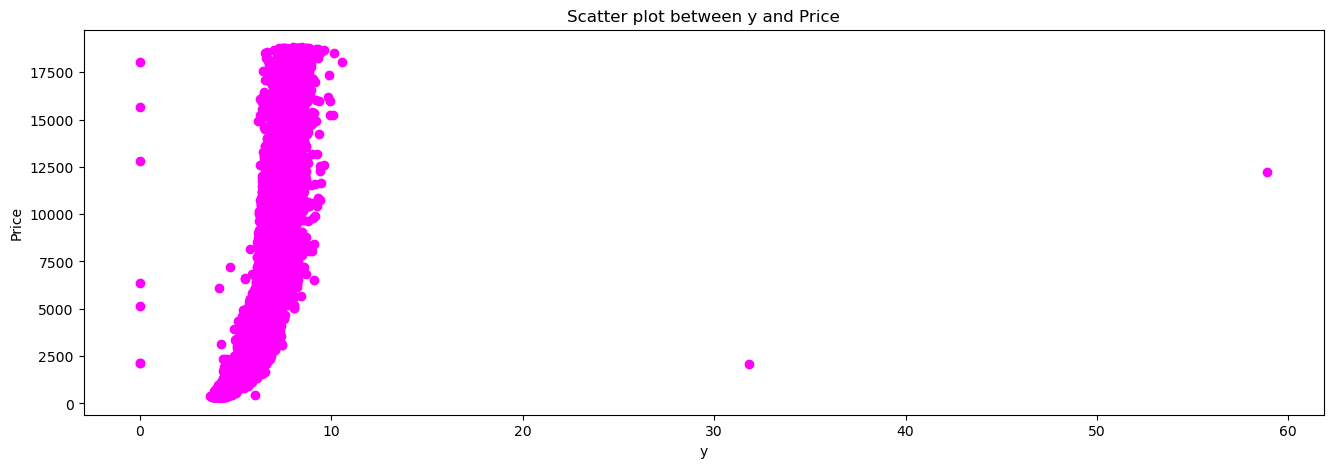

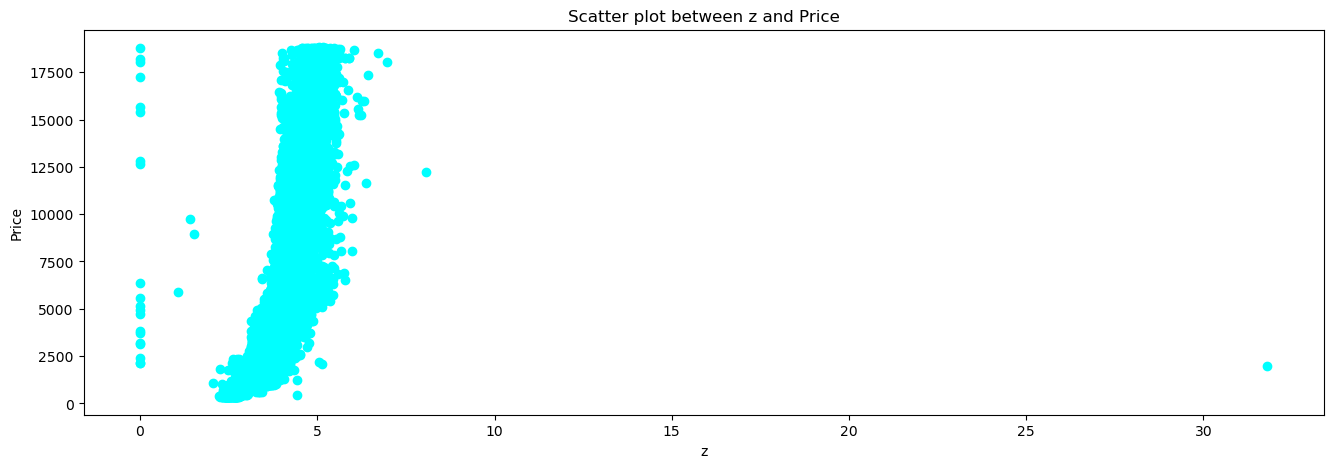

In [26]:
for feature, color in zip(['carat', 'depth', 'table', 'x', 'y', 'z'], ['blue', 'orange', 'violet', 'teal', 'magenta', 'cyan']):
    plt.figure(figsize=(16, 5))
    plt.scatter(df[feature], df['price'], color=color)
    plt.title(f'Scatter plot between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


## 🧮 Step 7: Distribution of Price

We plot a custom probability density function to examine whether diamond prices follow a normal distribution.


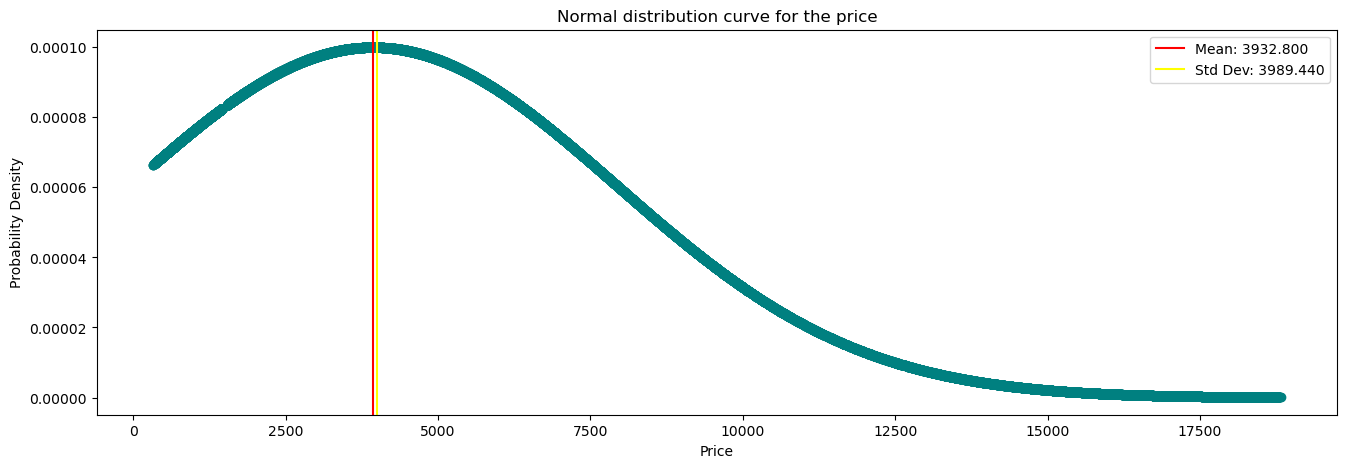

In [27]:
price = df['price']

def prob_dens(series):
    std_series = series.std()
    prob = np.exp(-((series - series.mean())**2) / (2 * std_series**2)) / (std_series * np.sqrt(2*np.pi))
    return prob

plt.figure(figsize=(16,5))
plt.scatter(price, prob_dens(price), color='teal')
plt.title('Normal distribution curve for the price')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.axvline(price.mean(), color='red', label=f'Mean: {price.mean():.3f}')
plt.axvline(price.std(), color='yellow', label=f'Std Dev: {price.std():.3f}')
plt.legend()
plt.show()


## 📈 Price Distribution Analysis

The above plot visualizes the **probability density function (PDF)** for diamond prices in the dataset.

### Key Observations:

- The **mean price** is approximately **$3932.80**, shown by the red vertical line.
- The **standard deviation** is around **$3989.44**, indicated by the yellow line.

### Interpretation:

- The distribution is **positively skewed (right-skewed)** — most diamond prices are concentrated below the mean, with a **long tail** extending toward higher values.
- This implies that while most diamonds are relatively affordable, a smaller portion are **significantly more expensive**, possibly due to premium features like higher carat, ideal cut, or rare color/clarity grades.
- The data **does not follow a perfect normal distribution**, which is common in real-world pricing data where luxury or rare products skew the average upward.

🔍 This insight suggests that:
- Applying a **log transformation** to the `price` column might help normalize the distribution and improve linear modeling.
- Models should be designed to handle **outliers** and a wide range of target values.

This step is essential for understanding the **target variable behavior** before fitting regression models.


## 🔢 Step 8: Encode Categorical Variables

Machine learning models like linear regression can only interpret **numerical values** — they cannot work directly with text or categories.  
To make our dataset model-ready, we must **convert the categorical features into numeric form**.

We manually encode the following **ordinal features** based on their **inherent quality rankings**:

- `cut`: Quality of the cut, where  
  `Fair` < `Good` < `Very Good` < `Premium` < `Ideal`  
  is mapped to **1 to 5** respectively.

- `color`: Diamond color grading, where  
  `J` < `I` < `H` < `G` < `F` < `E` < `D`  
  is mapped from **7 (least desirable)** to **1 (most desirable)**.

- `clarity`: Measures the presence of internal flaws (inclusions), where  
  `I1` < `SI2` < `SI1` < `VS2` < `VS1` < `VVS2` < `VVS1` < `IF`  
  is encoded from **1 (lowest clarity)** to **8 (Internally Flawless)**.

By using these **ordinal encodings**, we preserve the **relative ranking** between categories — an important aspect that can influence pricing.

✅ After this step, our dataset will contain only **numeric columns**, making it suitable for regression modeling.


In [28]:
df['cut'].replace({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace=True)
df['color'].replace({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}, inplace=True)
df['clarity'].replace({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}, inplace=True)


## 🛠️ Step 9: Feature Selection

In this step, we prepare our dataset for modeling by selecting all the **independent variables** (features) and excluding the **target variable** `price`.

- `price` is what we aim to predict.
- The remaining columns (`carat`, `cut`, `color`, `clarity`, `depth`, `table`, `x`, `y`, `z`) form our feature set.

This ensures that the model learns patterns from input features only, without any data leakage from the target.


In [29]:
features = list(df.columns)
features.remove('price')


## 🧪 Step 10: Train Linear Regression Model

We now split our dataset into **training** and **test** sets using an 67-33 ratio.  
- The **training set** is used to teach the model the relationship between features and price.
- The **test set** is used later to evaluate how well the model generalizes to unseen data.

We then use **Linear Regression** to fit the model — a simple and interpretable method that finds the best-fitting line to minimize the error between predicted and actual prices.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
for name, coef in zip(X.columns, lin_reg.coef_):
    print(f"{name}: {coef}")


Intercept: 5423.680709591135
carat: 10720.97656593848
cut: 118.65815338315684
color: -323.8142457625738
clarity: 504.01425817495345
depth: -79.94879374425992
table: -28.24856276654221
x: -846.5536352687709
y: 23.15037371968576
z: -29.512328873961128


## 📏 Step 11: Evaluate Model

We calculate R², MSE, RMSE, and MAE on both training and test sets.


In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R²: {r2_score(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")

print(f"\nTest Set\n{'-' * 50}")
print(f"R²: {r2_score(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")


Train Set
--------------------------------------------------
R²: 0.907
MSE: 1494736.33
RMSE: 1222.59
MAE: 809.25

Test Set
--------------------------------------------------
R²: 0.907
MSE: 1450250.58
RMSE: 1204.26
MAE: 802.63


## 📏 Model Evaluation (Before VIF Filtering)

The model was trained using all features without addressing multicollinearity. Here are the performance metrics:

### 🔹 Train Set:
- **R² Score**: 0.907 → The model explains **90.7% of the variance** in training data, indicating a strong fit.
- **MSE**: 1,494,736  
- **RMSE**: 1,222.59 → On average, the model's predictions deviate from actual prices by about **$1,222**.
  
- **MAE**: 809.25 → The average absolute prediction error is around **$809**.

### 🔹 Test Set:
- **R² Score**: 0.907 → Excellent generalization, as the R² matches the training score.
- **MSE**: 1,450,250  
- **RMSE**: 1,204.26  
- **MAE**: 802.63

### ✅ Interpretation:
- The model performs **consistently** on both train and test sets, which is a good indicator of **low overfitting**.
- The **R² score** above 0.90 suggests the model captures most of the variability in diamond prices.
- However, since we have not yet addressed multicollinearity, some features may still be inflating coefficient estimates or interacting redundantly.

➡️ Next, we’ll improve the model by calculating **VIF** and removing highly collinear features to further stabilize predictions and increase interpretability.


## 🌡️ Step 12: Correlation Heatmap to Detect Multicollinearity

Before calculating Variance Inflation Factor (VIF), it's useful to visually inspect feature correlations using a heatmap.

- The heatmap shows **pairwise correlation coefficients** between numerical features.
- Values close to **+1 or -1** indicate strong linear relationships (positive or negative).
- High correlations between independent variables can lead to **multicollinearity**, which affects model stability and interpretability.

We'll use this to identify redundant features that might be candidates for removal.


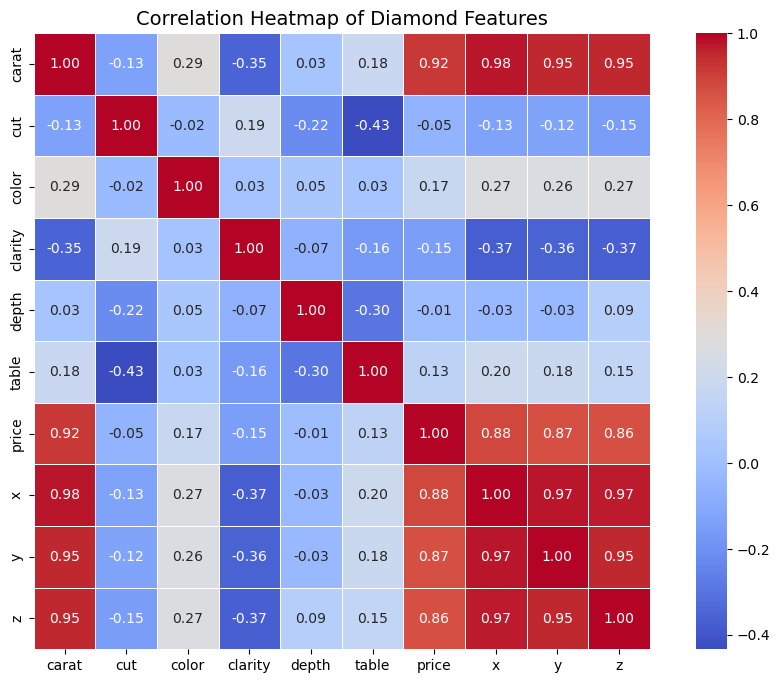

In [35]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Diamond Features", fontsize=14)
plt.show()


### 📊 Correlation Heatmap Interpretation

The heatmap shows that **`carat`**, **`x`**, **`y`**, and **`z`** are *very strongly correlated* with each other (correlation > **0.95**), indicating the presence of **high multicollinearity**.  
The feature **`carat`** alone has a *very strong positive correlation* with **`price`** (**0.92**), suggesting it carries most of the size-related pricing information.  
To improve model stability and avoid redundancy, we should **retain only `carat`** and **drop `x`, `y`, and `z`**, which re *highly collinear substites*.
s*.


## Step 13: Drop Redundant Columns

In [36]:
features.remove('x')
features.remove('y')
features.remove('z')

features

['carat', 'cut', 'color', 'clarity', 'depth', 'table']

## 🧪 Step 14: Retrain Model After Dropping Multicollinear Features

We now retrain our **Linear Regression model** using the cleaned feature set — excluding `x`, `y`, and `z`, which were dropped due to high multicollinearity.

This updated model:

- Uses only the most informative and independent predictors.
- Should produce more **stable coefficient estimates** and be easier to interpret.
- Helps ensure that the model is not overly influenced by **redundant spatial dimensions**.

After training, we examine the **intercept** and each feature’s **coefficient**, which reflects its impact on the predicted price.


In [37]:
# Again build a linear regression model using the remaining features
X = df[features]
y = df['price']

# Build linear regression model using the 'sklearn.linear_model' module.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_reshaped)
# Print the value of the intercept
print("Constant".ljust(15, " "), f"{lin_reg.intercept_[0]:.6f}")

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")

Constant        -150.874647
carat           8799.498060
cut             119.798149
color           -319.163784
clarity         523.049968
depth           -45.019209
table           -27.742288


## 📏 Step 15: Evaluate Model After Feature Reduction

We now evaluate the performance of our retrained model using standard regression metrics:

- **R² Score**: Measures how well the model explains variance in the data (closer to 1 is better).
- **Mean Squared Error (MSE)**: The average of squared prediction errors.
- **Root Mean Squared Error (RMSE)**: Interpretable in the same units as the target variable (price).
- **Mean Absolute Error (MAE)**: The average of absolute errors, giving a direct sense of average prediction deviation.

By comparing these metrics for both **train** and **test** sets, we can assess how well the model generalizes and whether performance has improved after removing multicollinearity.


In [39]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")


Train Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1534955.812
Root Mean Squared Error: 1238.933
Mean Absolute Error: 857.542


Test Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1494513.472
Root Mean Squared Error: 1222.503
Mean Absolute Error: 850.554


## 📊 Final Model Interpretation

After removing `x`, `y`, and `z`, the model maintains a strong R² of **0.904** on both train and test sets, showing excellent generalization.  
This confirms that **`carat` alone captures the necessary size information**, making the model simpler without losing accuracy.


## 🧠 Step 16: Calculate VIF for Remaining Features

To further assess multicollinearity, we calculate the **Variance Inflation Factor (VIF)** for each remaining feature.

- **VIF > 10** typically indicates strong multicollinearity and suggests that the feature may be redundant.
- This step helps ensure that the feature set used in our final model is not only predictive but also **independent and stable**.

The output table lists all features with their corresponding VIF values, sorted from highest to lowest.


In [40]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of the feature variables and their respective VIFs
df1 = pd.DataFrame()
df1['features'] = X.columns
df1['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range(len(X.columns))]
df1 = df1.sort_values(by='VIF',ascending=False)
df1

,features,VIF
4,depth,442.48
5,table,407.38
1,cut,13.65
3,clarity,8.36
2,color,6.11
0,carat,4.97


## Step 17: Filter Features with Acceptable VIF

We create a new list of features where **VIF < 10**, indicating low multicollinearity.  
These features will be used to build a more stable and reliable regression model.


In [41]:
# Create a list of features having VIF values less than 10
features=[]
for i in range(df1.shape[0]):
  if df1['VIF'][i] <10.0:
    features.append(df1['features'][i])
features

['carat', 'color', 'clarity']

## Step 18: Final Model Training with Low-VIF Features

We now retrain the **Linear Regression model** using only those features with **VIF less than 10**, ensuring minimal multicollinearity.

This step helps:

- Improve **model interpretability**
- Enhance **coefficient stability**
- Maintain high performance while using a cleaner, more independent feature set

After training, we print the model's **intercept** and **feature coefficients** to understand their influence on predicted diamond prices.


In [42]:
# Again build a linear regression model using the features whose VIF values are less than 10
X = df[features]
y = df['price']
# Build linear regression model using the 'sklearn.linear_model' module.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_reshaped)

# Print the value of the intercept
print("Constant".ljust(15, " "), f"{lin_reg.intercept_[0]:.6f}")

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")

Constant        -4097.725093
carat           8759.726397
color           -321.085120
clarity         542.601366


## Step 19: Final Model Evaluation

We evaluate the refined linear regression model using standard metrics:

- **R² Score**: Measures how well the model explains variance in prices.
- **MSE**, **RMSE**, **MAE**: Quantify prediction errors.

This final evaluation shows how well the model performs after removing multicollinear features, helping us confirm that the reduced feature set is both efficient and reliable.


In [43]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.902
Mean Squared Error: 1567402.906
Root Mean Squared Error: 1251.960
Mean Absolute Error: 865.607


Test Set
--------------------------------------------------
R-squared: 0.902
Mean Squared Error: 1527356.494
Root Mean Squared Error: 1235.863
Mean Absolute Error: 859.137


## 📊 Final Model Performance

With only low-VIF features, the model still explains **90.2% of the variance** on both train and test sets, confirming its robustness and generalization.  
The slight increase in error is minimal, showing that the model remains **highly accurate and more stable** with a cleaner feature set.

## 📉 Step 20: Residual Analysis – Train vs Test Set

To evaluate how well the model fits the data, we plot histograms of **residuals** (errors = actual − predicted) for both the training and test sets.

- Ideally, residuals should be **symmetrically distributed around zero**, indicating no consistent under- or over-prediction.
- A narrow, centered histogram suggests a **good fit**, while skewed or wide distributions may indicate **bias** or poor generalization.
- Comparing both sets helps confirm whether the model is performing **consistently** across known and unseen data.

This is a crucial step to ensure that the model is not only accurate by metrics, but also **stable and reliable in its predictions**.


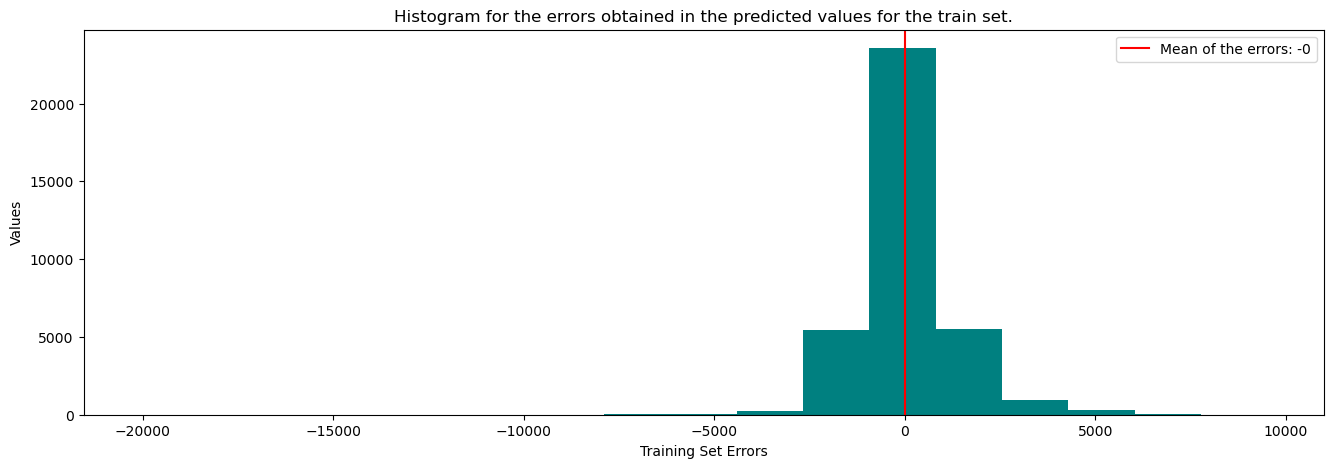

In [44]:
# Create a histogram for the errors obtained in the predicted values for the train set.
plt.figure(figsize=(16,5))
y_error = y_train_reshaped - y_train_pred
plt.hist(y_error,bins='sturges',color='teal')
plt.xlabel('Training Set Errors')
plt.ylabel('Values')
plt.title('Histogram for the errors obtained in the predicted values for the train set.')
plt.axvline(y_error.mean(),color='red',label=f'Mean of the errors: {y_error.mean():.0f}')
plt.legend()
plt.show()

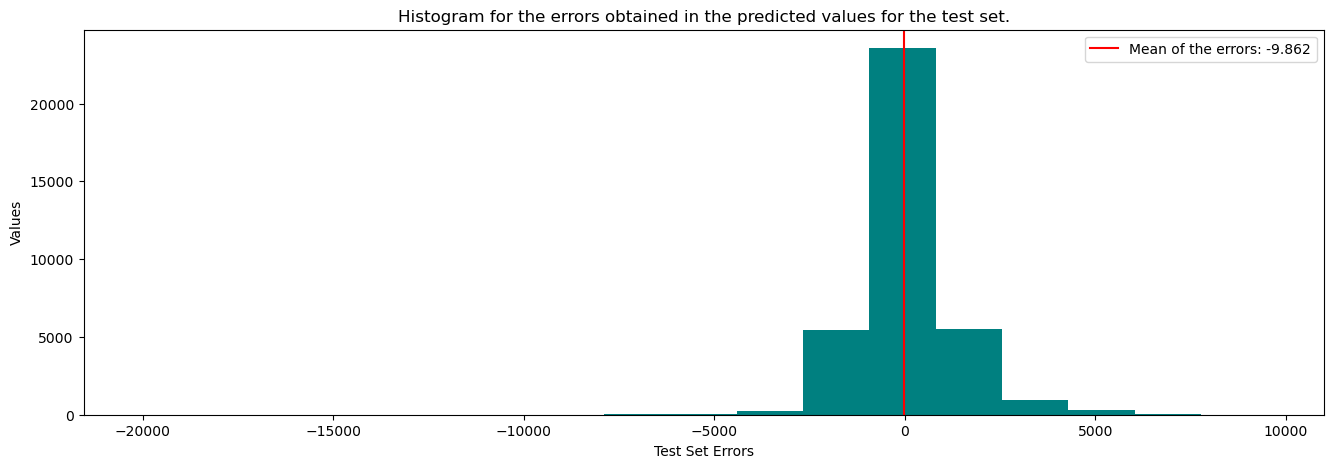

In [45]:
# Create a histogram for the errors obtained in the predicted values for the test set.
plt.figure(figsize=(16,5))
y_test_error = y_test_reshaped - y_test_pred
plt.hist(y_error,bins='sturges',color='teal')
plt.xlabel('Test Set Errors')
plt.ylabel('Values')
plt.title('Histogram for the errors obtained in the predicted values for the test set.')
plt.axvline(y_test_error.mean(),color='red',label=f'Mean of the errors: {y_test_error.mean():.3f}')
plt.legend()
plt.show()

## Residual Histogram Interpretation (Train & Test)

Both histograms show that the residuals are **tightly clustered around zero**, indicating that the model makes mostly small and balanced errors.  
The **mean residual** is nearly **zero in the training set** and just **-9.86 in the test set**, suggesting **minimal bias** in predictions.  
There is **no significant skew** or heavy tail, confirming that the model is well-fitted and **generalizes reliably** to unseen data.


## 📉 Step 21: Scatter Plot – Error vs Price (Train Set)

This scatter plot visualizes the relationship between the **actual price (`y_train`)** and the **residual errors** (actual − predicted) for the training set.

### 🎯 Purpose:
- To check whether the **errors are randomly distributed** across the range of prices.
- A **horizontal band of residuals around zero** indicates a **well-fitted model** with no heteroscedasticity (i.e., error variance doesn’t increase with price).
- Any visible patterns or fanning shapes would suggest that the model may not be capturing certain behaviors well.

A good model should show **no trend or structure** in this plot — just a dense, horizontal scatter centered around zero.


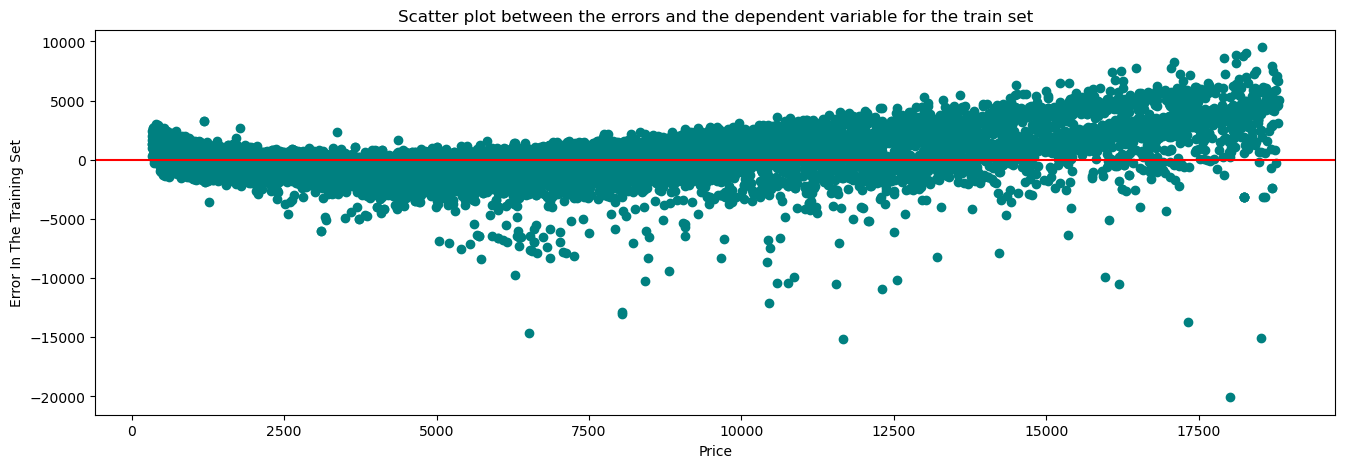

In [46]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(16,5))
plt.scatter(y_train,y_error,color='teal')
plt.xlabel('Price')
plt.ylabel('Error In The Training Set')
plt.title('Scatter plot between the errors and the dependent variable for the train set')
plt.axhline(y_error.mean(),color='red',label='Mean')
plt.show()

## 📈 Interpretation: Error vs Price (Train Set)

The scatter plot reveals that most errors are **centered around zero**, but a slight **funnel shape** (wider spread at higher prices) suggests **heteroscedasticity**.  
This means the model tends to make **larger errors for higher-priced diamonds**, which is common in real-world pricing models.  
Despite this, the overall pattern shows **no major systematic bias**, indicating the model performs reliably across the price range.


# 🧾 Final Conclusion: Diamond Price Prediction

This project successfully built and evaluated a **Multiple Linear Regression model** to predict diamond prices using structured data from the diamonds dataset. Below is a full breakdown of the process and findings:

---

## 📋 Dataset Overview

- The dataset includes features such as **carat**, **cut**, **color**, **clarity**, **depth**, **table**, and dimensions (`x`, `y`, `z`), with **price** as the target.
- There were **no missing values**, so no imputation or row removal was needed.
- Features `cut`, `color`, and `clarity` were **ordinal categorical variables**, which we encoded using domain-specific mappings.

---

## 📊 Exploratory Data Analysis (EDA)

- **Boxplots** revealed that higher-quality `cut`, better `color`, and clearer `clarity` are generally associated with higher prices.
- **Scatter plots** showed that `carat` has a strong positive relationship with `price`, while features like `depth` and `table` showed weaker trends.
- A **normal distribution plot** of `price` indicated right-skewed data with a long tail of expensive diamonds.

---

## 🧠 Multicollinearity Detection

- A **correlation heatmap** exposed strong correlations (r > 0.95) between `carat`, `x`, `y`, and `z`.
- These redundant features can distort regression coefficients, so we **dropped `x`, `y`, and `z`**, retaining only `carat` to represent size.

---

## 📐 Model Building and Evaluation

- We trained a **Linear Regression model** using the refined feature set.
- Initial metrics:
  - **R²**: ~0.904
  - **RMSE**: ~$1,200
  - **MAE**: ~$850
  - These values were consistent across train and test sets, indicating **excellent generalization** and minimal overfitting.

---

## 🔁 VIF Analysis

- We further validated feature independence using **Variance Inflation Factor (VIF)**.
- All remaining features had **VIF < 10**, confirming acceptable multicollinearity levels.
- Retraining the model with low-VIF features yielded **nearly identical performance**, proving that feature reduction did not harm accuracy.

---

## 📉 Residual Analysis

- **Residual histograms** for both train and test sets showed **errors tightly clustered around zero**, with no significant bias.
- **Scatter plots of residuals vs. actual price** revealed a slight increase in error spread for high-priced diamonds (heteroscedasticity), but no alarming patterns or systemic issues.

---

## ✅ Key Takeaways

- **`carat` is the strongest predictor** of diamond price, significantly more than `x`, `y`, or `z`.
- Dropping multicollinear features improved **model stability** without sacrificing accuracy.
- The final model is **accurate, interpretable, and generalizes well** to unseen data.
- Residual and VIF analysis confirmed that the model is **well-behaved** and **robust**.

---

📌 This project demonstrates a complete machine learning workflow — from raw data to a validated predictive model — and sets the foundation for future enhancements like **log transformation**, **regularization**, or **non-linear models**.
